# Model Evaluation

## Imports

In [1]:
# Import dataset
import pandas as pd
import numpy as np

# Estimators
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor
from sklearn.svm import OneClassSVM,SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Function Definition

In [4]:
def evaluate_model(classifier,
                   X_train,y_train,X_test,y_test,X_reduced,
                   classifier_name,dataset_name,
                  supervised=False):
    if supervised:
        clf.fit(X_train,np.ravel(y_train))
        pred=clf.predict(X_test)
    else:
        clf.fit(np.delete(X_train,np.where(y_train==-1.0),axis=0))
        pred=clf.predict(X_test)
    # Print F1 score
    print(f'F1 score for {classifier_name} on {dataset_name}: {f1_score(pred,y_test,pos_label=-1.0)}')
    print()
    # Print Confusion Matrix
    cm = confusion_matrix(y_test,pred,labels=(-1,1))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=(-1,1))
    disp.plot(values_format='')
    plt.title(f'Confusion Matrix for {classifier_name} on {dataset_name}')
    plt.savefig(f'./evaluation/plots/{classifier_name}-{dataset_name}-cm.png',bbox_inches='tight')
    plt.show()
    # Print Classification Plot
    comparison = np.ravel(y_test) == pred
    correctly_predicted = np.where(comparison, 1, 0)
    colors = ['red', 'green']
    plt.scatter(X_reduced[X_train.shape[0]:, 0], X_reduced[X_train.shape[0]:, 1], c=correctly_predicted, cmap=ListedColormap(colors),s=0.7, alpha=0.2)
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Incorrect Classification', markerfacecolor='red', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Correct Classification', markerfacecolor='green', markersize=10)]
    plt.legend(handles=legend_elements)
    plt.title(f'Predictions of {classifier_name} on {dataset_name} test set')
    plt.savefig(f'./evaluation/plots/{classifier_name}-{dataset_name}-plot.png',bbox_inches='tight')
    plt.show()

## Dataset Imports

In [5]:
X_train_kdd = pd.read_csv('./data/NSL_KDD/X_train.csv',index_col=0).to_numpy()
y_train_kdd = pd.read_csv('./data/NSL_KDD/y_train.csv',index_col=0).to_numpy()

X_test_kdd = pd.read_csv('./data/NSL_KDD/X_test.csv',index_col=0).to_numpy()
y_test_kdd = pd.read_csv('./data/NSL_KDD/y_test.csv',index_col=0).to_numpy()

# Change labels of test set such that it can be distinguished in the concatenated version
y_test_kdd_label_change = np.where(y_test_kdd == -1, 2, y_test_kdd)
y_test_kdd_label_change = np.where(y_test_kdd_label_change == 1, 3, y_test_kdd_label_change)

X_kdd = np.concatenate((X_train_kdd, X_test_kdd), axis=0)
y_kdd = np.concatenate((y_train_kdd, y_test_kdd_label_change), axis=0)
y_kdd = np.ravel(y_kdd)

# TSNE-reduced dataset import
X_kdd_tsne = pd.read_csv('./data_visualization/tsne_kdd.csv',header=None).to_numpy()

In [6]:
X_train_unsw = pd.read_csv('./data/UNSW_NB15/X_train.csv',index_col=0).to_numpy()
X_test_unsw = pd.read_csv('./data/UNSW_NB15/X_test.csv',index_col=0).to_numpy()

y_train_unsw = pd.read_csv('./data/UNSW_NB15/y_train.csv',index_col=0).to_numpy()
y_test_unsw = pd.read_csv('./data/UNSW_NB15/y_test.csv',index_col=0).to_numpy()

y_test_unsw_label_change = np.where(y_test_unsw == -1, 2, y_test_unsw)
y_test_unsw_label_change = np.where(y_test_unsw_label_change == 1, 3, y_test_unsw_label_change)

X_unsw = np.concatenate((X_train_unsw, X_test_unsw), axis=0)
y_unsw = np.concatenate((y_train_unsw, y_test_unsw_label_change), axis=0)
y_unsw = np.ravel(y_unsw)

# TSNE-reduced dataset import
X_unsw_tsne = pd.read_csv('./data_visualization/tsne_unsw.csv',header=None).to_numpy()

## Dataset Visualization of NSL_KDD

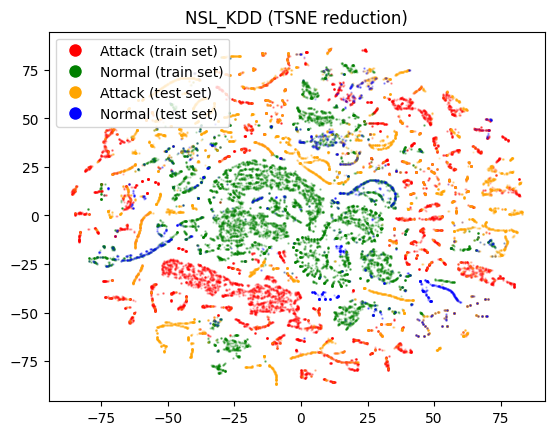

In [9]:
colors = ['red', 'green', 'orange', 'blue']

plt.scatter(X_kdd_tsne[y_kdd==-1, 0], X_kdd_tsne[y_kdd==-1, 1], c='r', label='attack_train',s=0.5, alpha=0.2)
plt.scatter(X_kdd_tsne[y_kdd==1, 0], X_kdd_tsne[y_kdd==1, 1], c='g', label='normal_train',s=0.5, alpha=0.2)
plt.scatter(X_kdd_tsne[y_kdd==2, 0], X_kdd_tsne[y_kdd==2, 1], c='orange', label='attack_test',s=0.5, alpha=0.2)
plt.scatter(X_kdd_tsne[y_kdd==3, 0], X_kdd_tsne[y_kdd==3, 1], c='b', label='normal_test',s=0.5, alpha=0.2)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Attack (train set)', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal (train set)', markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Attack (test set)', markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal (test set)', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)
plt.title("NSL_KDD (TSNE reduction)")
plt.savefig("./evaluation/plots/nsl_kdd_tsne",bbox_inches='tight')
plt.show()

## LOF on NSL_KDD

In [10]:
y_train_outliers = np.count_nonzero(y_train_kdd == -1)
class_ratio = y_train_outliers / y_train_kdd.shape[0]
print(class_ratio)

0.46653699587170533


F1 score for LOF on NSL_KDD: 0.8889002036659878



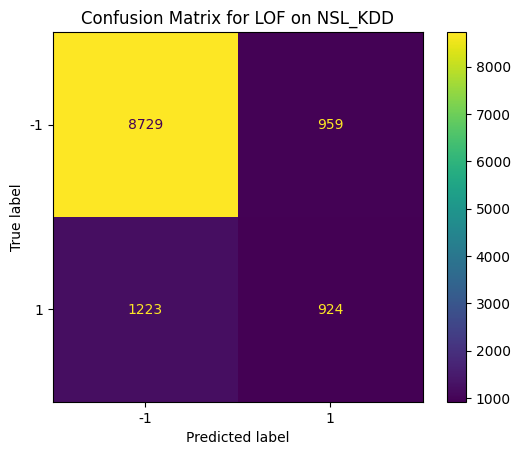

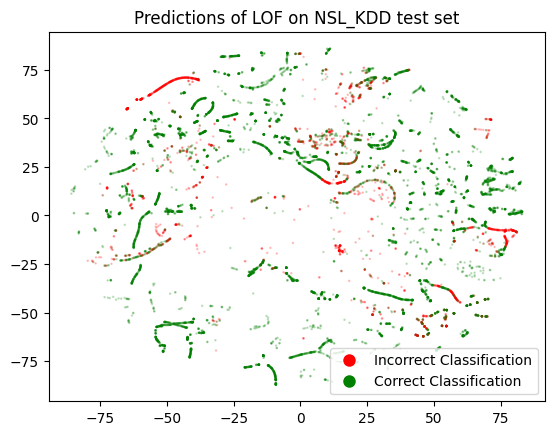

In [11]:
clf=LocalOutlierFactor(contamination=0.46653699587170533, n_neighbors=1,novelty=True)

evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"LOF","NSL_KDD")

## OCSVM on NSL_KDD

F1 score for OCSVM on NSL_KDD: 0.9071145226933182



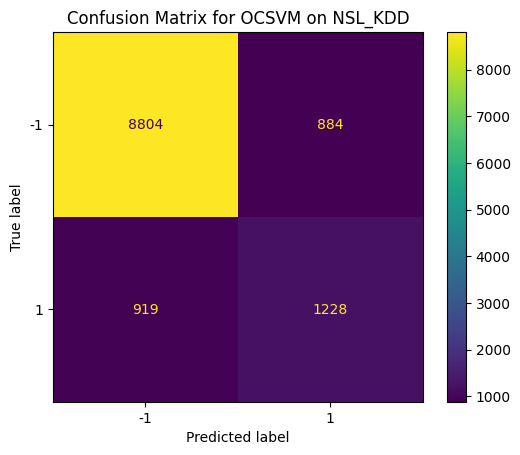

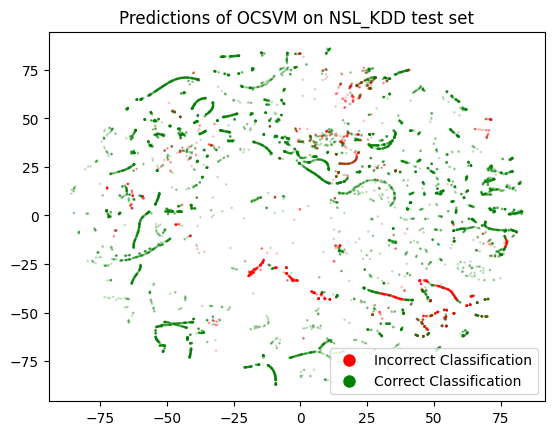

In [12]:
clf=OneClassSVM(gamma=0.2848404943774676, nu=0.036518077880987466)
evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"OCSVM","NSL_KDD")

## kNN on NSL_KDD

F1 score for kNN on NSL_KDD: 0.7042088091353996



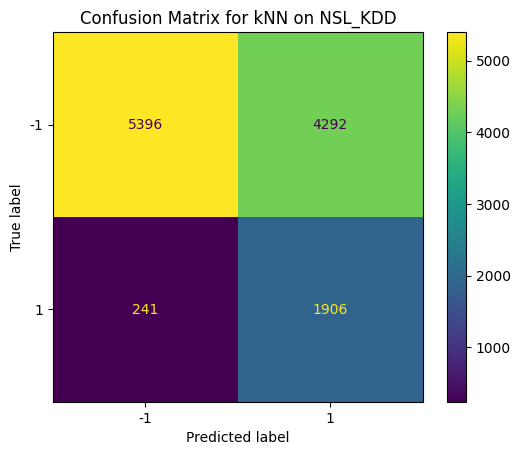

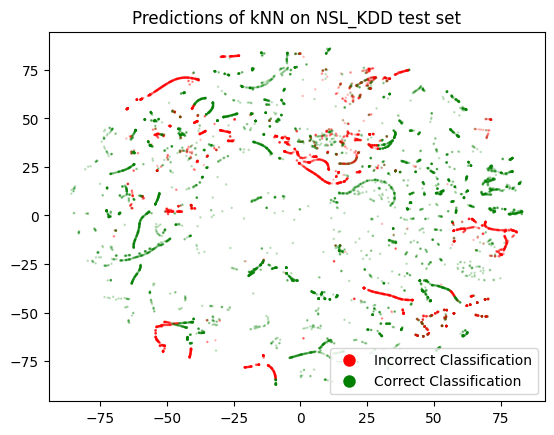

In [13]:
clf=KNeighborsClassifier(n_neighbors=1)
evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"kNN","NSL_KDD",supervised=True)

## LR on NSL_KDD

F1 score for Logistic Regression on NSL_KDD: 0.6105944197331177



/home/panopticon/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


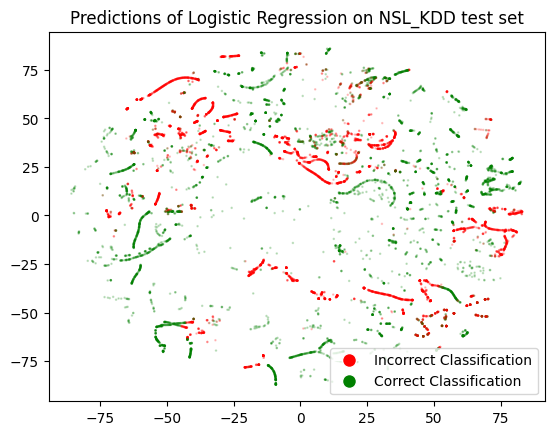

In [14]:
clf=LogisticRegression(C=4.2425022382673205)
evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"Logistic Regression","NSL_KDD",supervised=True)

## Random Forest on NSL_KDD

F1 score for Random Forest on NSL_KDD: 0.6887425938117182



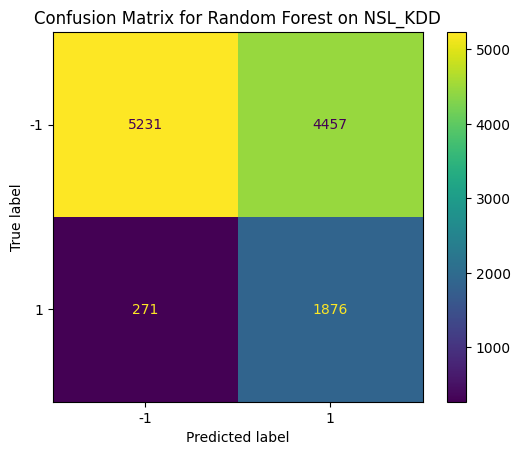

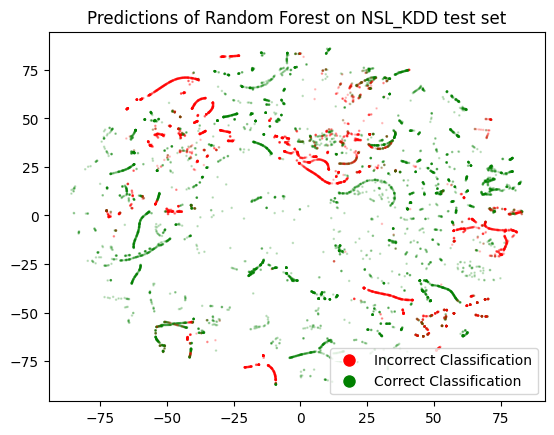

In [15]:
clf=RandomForestClassifier(max_depth=29, n_estimators=355)
evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"Random Forest","NSL_KDD",supervised=True)

## Gaussian Naive Bayes on NSL_KDD

F1 score for Gaussian Naive Bayes on NSL_KDD: 0.7019513150166417



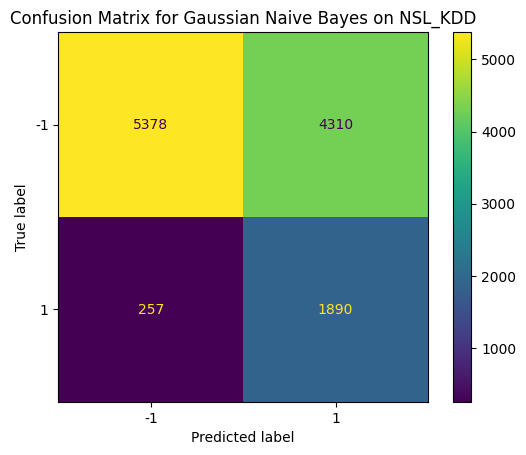

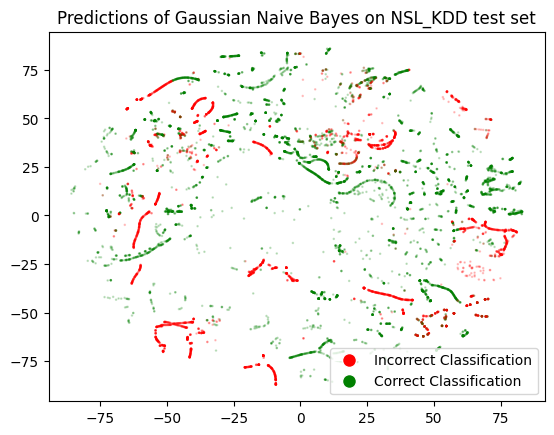

In [16]:
clf=GaussianNB(var_smoothing=0.005522117123602399)
evaluate_model(clf,X_train_kdd,y_train_kdd,X_test_kdd,y_test_kdd,X_kdd_tsne,"Gaussian Naive Bayes","NSL_KDD",supervised=True)

## Dataset Visualization of UNSW_NB15

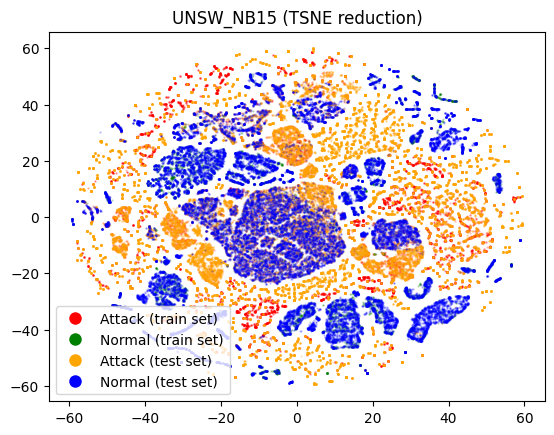

In [17]:
path = 'evaluation/plots/'

colors = ['red', 'green', 'orange', 'blue']

plt.scatter(X_unsw_tsne[y_unsw==-1, 0], X_unsw_tsne[y_unsw==-1, 1], c='r', label='attack_train',s=0.5, alpha=0.2)
plt.scatter(X_unsw_tsne[y_unsw==1, 0], X_unsw_tsne[y_unsw==1, 1], c='g', label='normal_train',s=0.5, alpha=0.2)
plt.scatter(X_unsw_tsne[y_unsw==2, 0], X_unsw_tsne[y_unsw==2, 1], c='orange', label='attack_test',s=0.5, alpha=0.2)
plt.scatter(X_unsw_tsne[y_unsw==3, 0], X_unsw_tsne[y_unsw==3, 1], c='b', label='normal_test',s=0.5, alpha=0.2)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Attack (train set)', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal (train set)', markerfacecolor='green', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Attack (test set)', markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal (test set)', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)
plt.title("UNSW_NB15 (TSNE reduction)")
plt.savefig("./evaluation/plots/unsw_nb15_tsne")
plt.show()

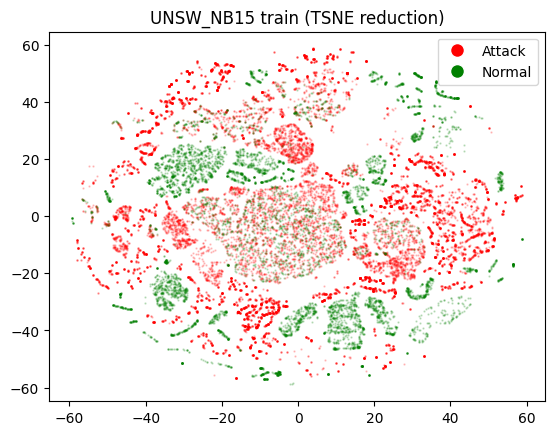

In [18]:
colors = ['red', 'green', 'orange', 'blue']

plt.scatter(X_unsw_tsne[y_unsw==-1, 0], X_unsw_tsne[y_unsw==-1, 1], c='r', label='attack_train',s=0.5, alpha=0.2)
plt.scatter(X_unsw_tsne[y_unsw==1, 0], X_unsw_tsne[y_unsw==1, 1], c='g', label='normal_train',s=0.5, alpha=0.2)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Attack', markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='green', markersize=10)]
plt.legend(handles=legend_elements)
plt.title("UNSW_NB15 train (TSNE reduction)")
plt.savefig("./evaluation/plots/unsw_nb15_tsne_train")
plt.show()

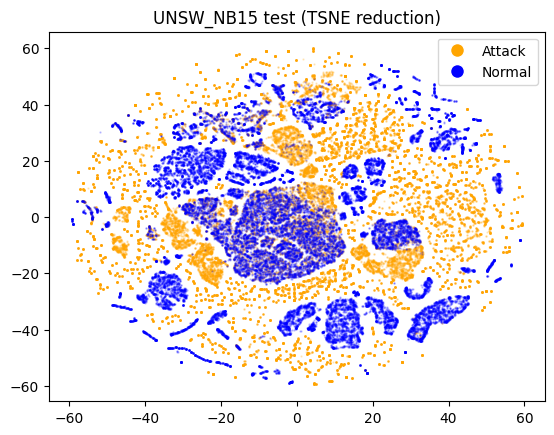

In [19]:
colors = ['red', 'green', 'orange', 'blue']

plt.scatter(X_unsw_tsne[y_unsw==2, 0], X_unsw_tsne[y_unsw==2, 1], c='orange', label='attack_test',s=0.5, alpha=0.2)
plt.scatter(X_unsw_tsne[y_unsw==3, 0], X_unsw_tsne[y_unsw==3, 1], c='b', label='normal_test',s=0.5, alpha=0.2)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Attack', markerfacecolor='orange', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Normal', markerfacecolor='blue', markersize=10)]
plt.legend(handles=legend_elements)
plt.title("UNSW_NB15 test (TSNE reduction)")
plt.savefig("./evaluation/plots/unsw_nb15_tsne_test")
plt.show()

## LOF on UNSW_NB15

F1 score for LOF on UNSW_NB15: 0.7769815222766713



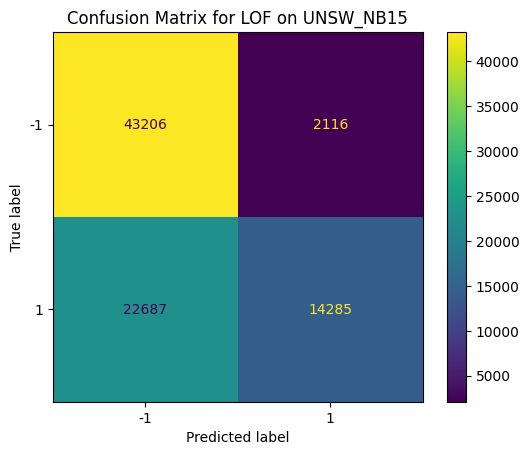

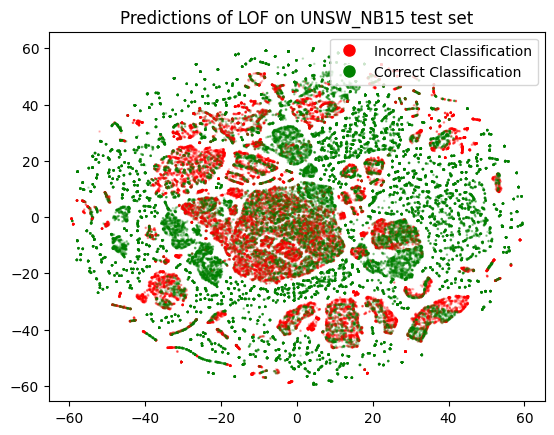

In [20]:
clf=LocalOutlierFactor(contamination=0.5, n_neighbors=11, novelty=True)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"LOF","UNSW_NB15")

## OCSVM on UNSW_NB15

F1 score for OCSVM on UNSW_NB15: 0.746989156797213



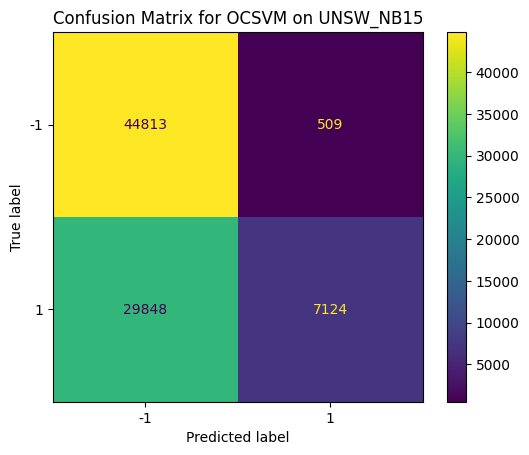

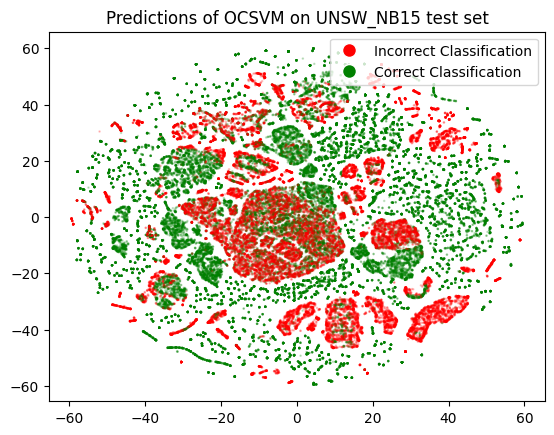

In [21]:
clf=OneClassSVM(gamma=0.6011150117432088, nu=0.700991852018085)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"OCSVM","UNSW_NB15")

## kNN on UNSW_NB15

F1 score for kNN on UNSW_NB15: 0.8611530861327444



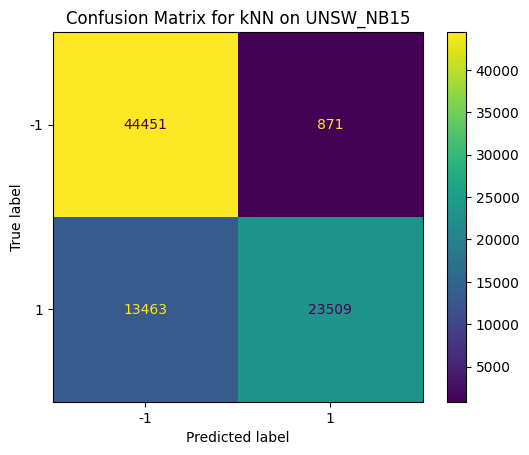

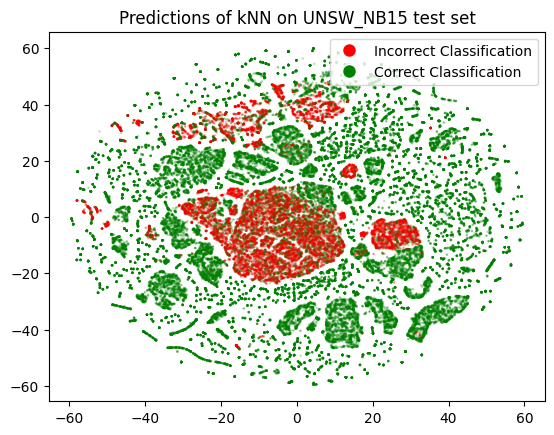

In [22]:
clf=KNeighborsClassifier(n_neighbors=2)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"kNN","UNSW_NB15",supervised=True)

## LR on UNSW_NB15

F1 score for Logistic Regression on UNSW_NB15: 0.8491798547308674



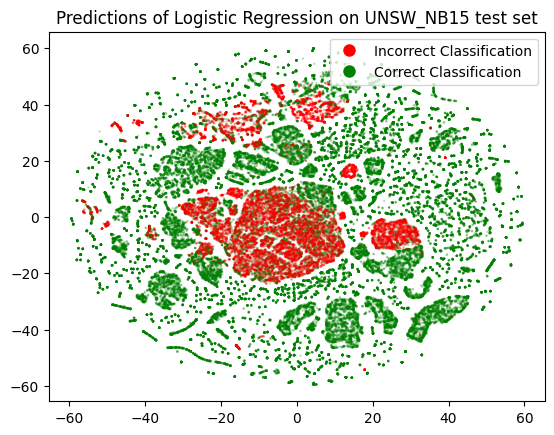

In [23]:
clf=LogisticRegression(C=2.285789221243009, max_iter=1000)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"Logistic Regression","UNSW_NB15", supervised=True)

## Random Forest on UNSW_NB15

F1 score for Random Forest on UNSW_NB15: 0.8528894200457339



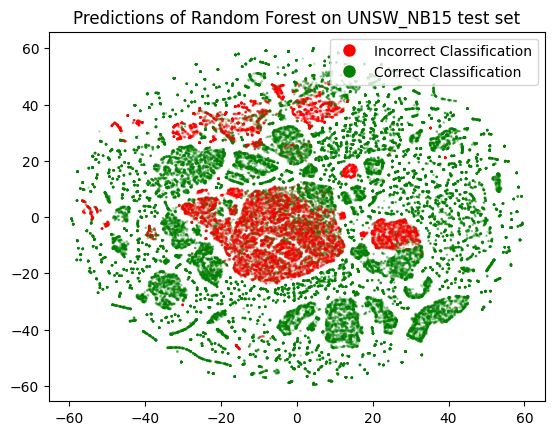

In [24]:
clf=RandomForestClassifier(max_depth=5, min_samples_leaf=12, min_samples_split=9,n_estimators=571)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"Random Forest","UNSW_NB15",supervised=True)

## Gaussian Naive Bayes on UNSW_NB15

F1 score for Gaussian Naive Bayes on UNSW_NB15: 0.7446312635258865



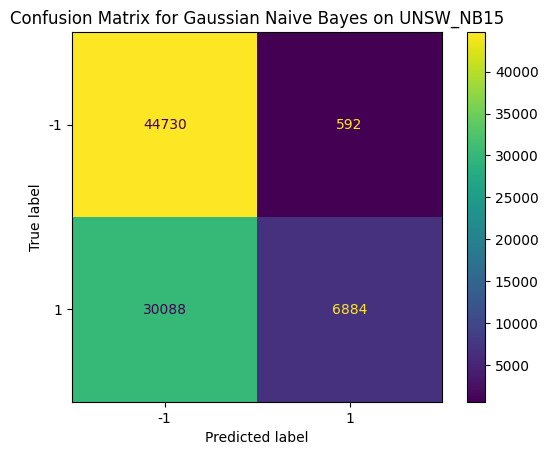

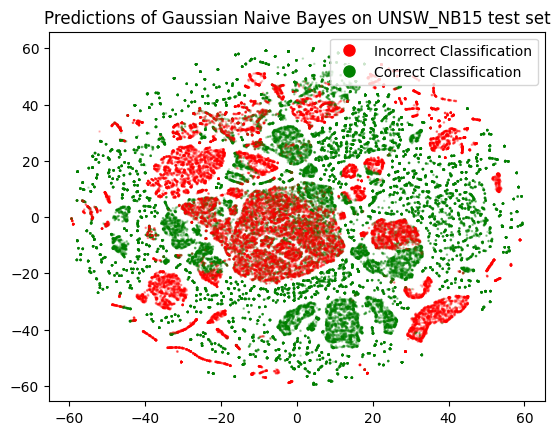

In [25]:
clf=GaussianNB(var_smoothing=0.5426960831582485)
evaluate_model(clf,X_train_unsw,y_train_unsw,X_test_unsw,y_test_unsw,X_unsw_tsne,"Gaussian Naive Bayes","UNSW_NB15",supervised=True)